In [250]:
# Import libraries used for the Project
import numpy as np 
import pandas as pd
from scipy import stats
from scipy.stats import skew, kurtosis


from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SelectFromModel


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [224]:
X_train = pd.read_csv("X_train.csv")
X_val = pd.read_csv("X_val.csv")
X_test = pd.read_csv("X_test.csv")

y_train = pd.read_csv("y_train.csv")
y_val = pd.read_csv("y_val.csv")
y_test = pd.read_csv("y_test.csv")

In [207]:
# Choose the number of features
top6_features = ['Rain_mm', 'RH_9am', 'RH_3pm', 'Temp_3pm', 'Max_Temp', 'Temp_9am']

Model Comparasion 

1 - Fitting Models

In [225]:
# first I will need to flip the values  of the prediction, this will allow to compare for the cases of Predicting Rain
y_train['Rain'] = y_train['Rain'].replace({0: 1, 1: 0})
y_test['Rain'] = y_test['Rain'].replace({0: 1, 1: 0})

y_train.value_counts(normalize=True)

Rain
1       0.701734
0       0.298266
dtype: float64

In [209]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(X_train[top6_features[:2]], y_train)

# Getting the parametres for the curve 
y_pred_prob_knn = knn.predict_proba(X_test[top6_features[:2]])[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
auc_knn = roc_auc_score(y_test, y_pred_prob_knn)

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [210]:
# Logistic Regression
log_reg = LogisticRegression(C=10, 
                             penalty='l1', 
                             solver='liblinear')
log_reg.fit(X_train[top6_features], y_train)

# Getting the parametres for the curve 
y_pred_prob_lr = log_reg.predict_proba(X_test[top6_features])[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [211]:
# Decision Tree
d_tree = DecisionTreeClassifier(criterion= 'gini', 
                                max_depth = 2, 
                                max_leaf_nodes= 2, 
                                min_samples_leaf= 50)
d_tree.fit(X_train[top6_features], y_train)

# Getting the parametres for the curve 
y_pred_prob_dt = d_tree.predict_proba(X_test[top6_features])[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

In [212]:
# SVC
svc = svm.SVC(kernel='poly', degree=4, probability=True)
svc.fit(X_train[top6_features], y_train)

# Getting the parametres for the curve 
y_pred_prob_svc = svc.decision_function(X_test[top6_features])
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_pred_prob_svc)
auc_svc = roc_auc_score(y_test, y_pred_prob_svc)

c:\Users\jmanu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [213]:
# Random Forest
ran_f = RandomForestClassifier(max_depth = 10, 
                               min_samples_leaf = 10, 
                               min_samples_split=15,
                               max_leaf_nodes=30, 
                               n_estimators = 10, 
                               criterion='entropy',
                               random_state=69)
ran_f.fit(X_train[top6_features], y_train)

# Getting the parametres for the curve
y_pred_prob_rf = ran_f.predict_proba(X_test[top6_features])[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

C:\Users\jmanu\AppData\Local\Temp\ipykernel_12620\520782117.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_f.fit(X_train[top6_features], y_train)


PART 1 - ROC Curves for each model

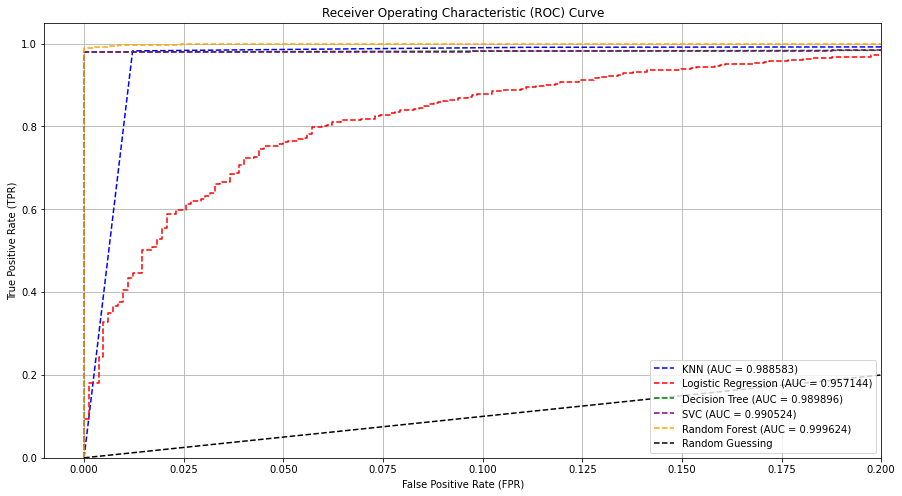

In [247]:

# Plot ROC curves
plt.figure(figsize=(15, 8))
plt.plot(fpr_knn, tpr_knn, color='blue', linestyle='--', label='KNN (AUC = {:.6f})'.format(auc_knn))
plt.plot(fpr_lr, tpr_lr, color='red', linestyle='--', label='Logistic Regression (AUC = {:.6f})'.format(auc_lr))
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='--', label='Decision Tree (AUC = {:.6f})'.format(auc_dt))
plt.plot(fpr_svc, tpr_svc, color='purple', linestyle='--', label='SVC (AUC = {:.6f})'.format(auc_svc))
plt.plot(fpr_rf, tpr_rf, color='orange', linestyle='--', label='Random Forest (AUC = {:.6f})'.format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (AUC =.5)')  
plt.xlim([-0.01, 0.2])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<Figure size 576x432 with 0 Axes>

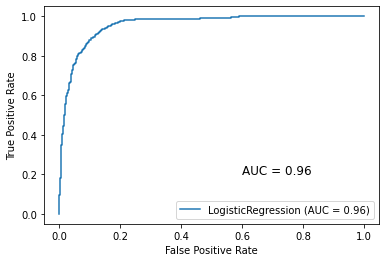

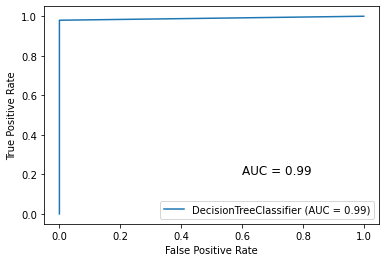

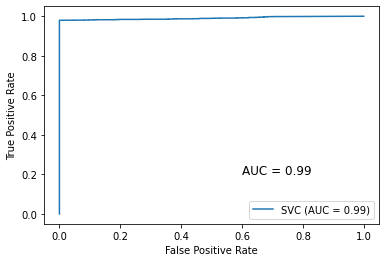

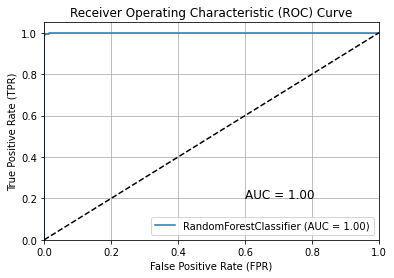

In [256]:
models = [log_reg, d_tree, svc, ran_f]
model_names = [log_reg.__class__.__name__, d_tree.__class__.__name__, svc.__class__.__name__, ran_f.__class__.__name__]
y_pred_probs = [model.predict_proba(X_test)[:, 1] for model in models]


# Plot ROC curves for multiple models
plt.figure(figsize=(8, 6))
for y_pred_prob, name in zip(y_pred_probs, model_names):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name=name)
    roc_display.plot()

    # Display AUC value on the plot
    plt.text(0.6, 0.2, f'AUC = {auc:.2f}', fontsize=12, color='black')

plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

[array([0.00166743, 0.98066092, 0.85198885, ..., 0.78004482, 0.96683668,
        0.97248561]),
 array([0.04860393, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]),
 array([1.43445380e-06, 8.90523785e-01, 8.90356187e-01, ...,
        8.90477626e-01, 8.90522741e-01, 8.90363297e-01]),
 array([0.04418605, 1.        , 1.        , ..., 1.        , 1.        ,
        0.9992891 ])]